In [1]:
using CSV, Images
using Convex, SCS

In [2]:
function read_image(filename :: String)
    image = CSV.read(filename;header=false)
    Y = convert(Matrix, image)
    return Y
end

read_image (generic function with 1 method)

In [3]:
function lasso(Y :: Matrix, λ=1.0, p=1)
    
    solver = SCSSolver(verbose=false)
    n, m = size(Y)
    Θ = Variable(n, m)
    
    obj = 0.5 * square(norm(vec(Y - Θ)))
    for i in 1:n
        for j in 1:m
            (j < m) ? (vec0 = abs(Θ[i, j] - Θ[i, j+1])) : (vec0 = 0)
            (i < n) ? (vec1 = abs(Θ[i, j] - Θ[i+1, j])) : (vec1 = 0)
            obj = obj + λ * norm(vcat(vec0, vec1), p)
        end
    end
    
    prob = minimize(obj)
    solve!(prob, solver)
    return prob.optval, Θ.value
end

lasso (generic function with 3 methods)

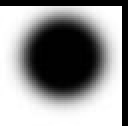

In [4]:
toy = read_image("../toy.csv")
img = Gray.(toy)

┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


199.76506083723208


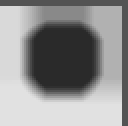

In [5]:
opt1, img1 = lasso(toy, 1, 1)
println(opt1)
Gray.(img1)

182.195910735048


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


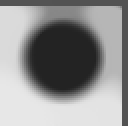

In [6]:
opt2, img2 = lasso(toy, 1, 2)
println(opt2)
Gray.(img2)

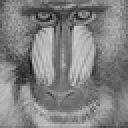

In [7]:
baboon = read_image("../baboon.csv")
img = Gray.(baboon)

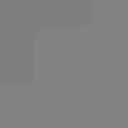

For 1-norm lasso problem with λ=1.0, the optimal value is 36.59956495865463 and the solution image is shown above.


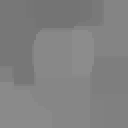

For 1-norm lasso problem with λ=0.5623413251903491, the optimal value is 34.71682852515979 and the solution image is shown above.


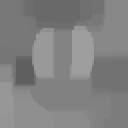

For 1-norm lasso problem with λ=0.31622776601683794, the optimal value is 29.21712609198416 and the solution image is shown above.


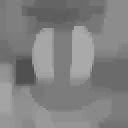

For 1-norm lasso problem with λ=0.1778279410038923, the optimal value is 22.60146094248819 and the solution image is shown above.


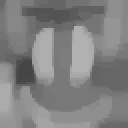

For 1-norm lasso problem with λ=0.1, the optimal value is 16.651521984834577 and the solution image is shown above.


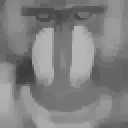

For 1-norm lasso problem with λ=0.05623413251903491, the optimal value is 11.91352183235471 and the solution image is shown above.


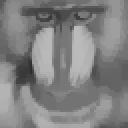

For 1-norm lasso problem with λ=0.03162277660168379, the optimal value is 8.19752325636375 and the solution image is shown above.


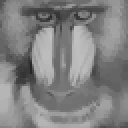

For 1-norm lasso problem with λ=0.01778279410038923, the optimal value is 5.424481105411913 and the solution image is shown above.


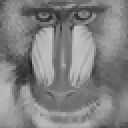

For 1-norm lasso problem with λ=0.01, the optimal value is 3.446810173293887 and the solution image is shown above.


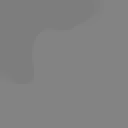

For 2-norm lasso problem with λ=1.0, the optimal value is 36.42261488992827 and the solution image is shown above.


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


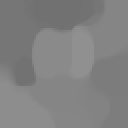

For 2-norm lasso problem with λ=0.5623413251903491, the optimal value is 33.77584638066108 and the solution image is shown above.


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


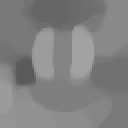

For 2-norm lasso problem with λ=0.31622776601683794, the optimal value is 27.72448963616958 and the solution image is shown above.


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


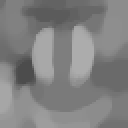

For 2-norm lasso problem with λ=0.1778279410038923, the optimal value is 21.085202998806004 and the solution image is shown above.


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/zzz/.julia/packages/Convex/81M4N/src/solution.jl:48


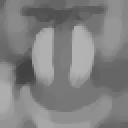

For 2-norm lasso problem with λ=0.1, the optimal value is 15.345543079785996 and the solution image is shown above.


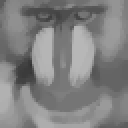

For 2-norm lasso problem with λ=0.05623413251903491, the optimal value is 10.786650678300848 and the solution image is shown above.


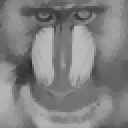

For 2-norm lasso problem with λ=0.03162277660168379, the optimal value is 7.262279843486341 and the solution image is shown above.


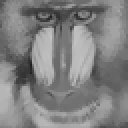

For 2-norm lasso problem with λ=0.01778279410038923, the optimal value is 4.69310885180088 and the solution image is shown above.


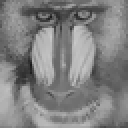

For 2-norm lasso problem with λ=0.01, the optimal value is 2.9123384884199224 and the solution image is shown above.


In [9]:
Θ = []
for p in 1:2
    for λ in 0:8
        opt, img = lasso(baboon, 10^(-λ/4), p)
        push!(Θ, (opt, img))
        println("For $p-norm lasso problem with λ=$(10^(-λ/4)), the optimal value is $opt and the solution image is shown above.")
        display(Gray.(img))
    end
end